In [1]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn import tree

In [2]:
# cargar el conjunto de datos iris

iris = load_iris()
X = iris.data
y = iris.target

# dividir la poblacion en muestras para entrenar y muestras de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [3]:
# Medir el tiempo de ejecución
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Tiempo empleado en obtener la significación de cada característica: {elapsed_time:.3f} seconds")

Tiempo empleado en obtener la significación de cada característica: 0.010 seconds


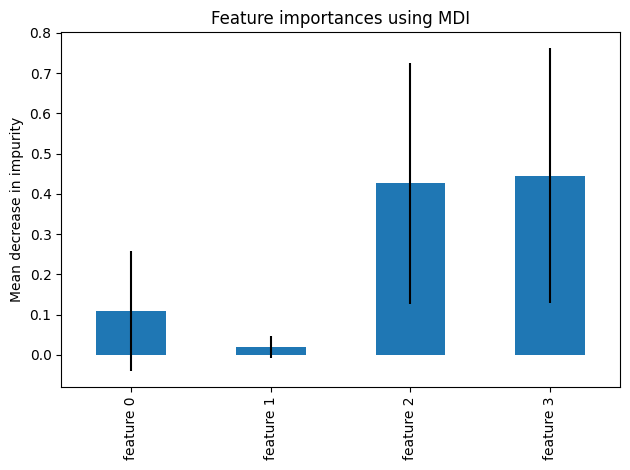

In [4]:
# Mostrar la significación de cada característica
# Mean Decrease in Impurity

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [5]:
# Medir el tiempo de ejecución
start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=0, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Tiempo empleado en obtener la significación de cada característica: {elapsed_time:.3f} segundos")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Tiempo empleado en obtener la significación de cada característica: 1.397 segundos


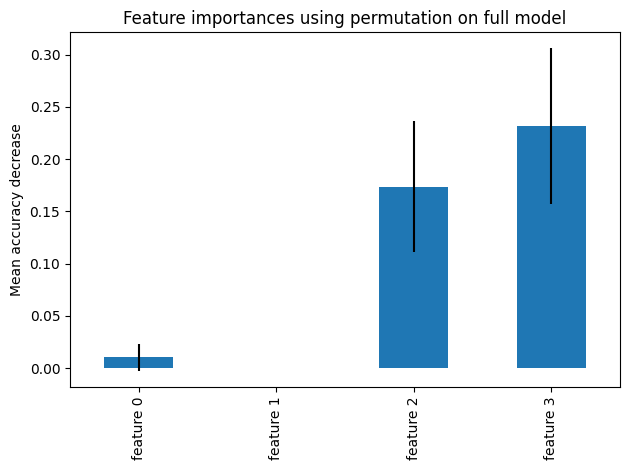

In [6]:
# Diferencia significación de cada característica usando el método "permutación de característica"

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()